# Homework 4

Spencer Pease  
ASTR 427

----------------------------

In [1]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Problem 1

In [2]:
# Golden Section Search method

def goldenSearch(lb, rb, f, tol=1e-6):
    """
    goldenSearch finds the minimun of a given function of one variable via a Golden Section Search,
    given an initial left and right bound. The function returns the minimum of the function when the
    bounds are within the given tolerance
    - lb: left bound
    - rb: right bound
    - f: function of a single variable
    - tol: tolerance of the minimum required distance between lb and rb (default 1e-6)
    - return: location of that minimizes the function f
    """
    
    #golden ratio ~ .618
    gratio = (np.sqrt(5) - 1) / 2 
    
    # evaluate function at bounds
    flb = f(lb)
    frb = f(rb)
    
    # compute internal 'midpoints'
    lm = rb - gratio*(rb - lb) 
    rm = lb + gratio*(rb - lb)
    
    # evaluate function at internal 'midpoints'
    flm = f(lm)
    frm = f(rm)
    
    while (np.abs(lb - rb) > tol):
        if flm < frm:
            rb = rm
            rm = lm
            lm = rb - gratio*(rb - lb)
            frm = flm
            flm = f(lm)
        else:
            lb = lm
            lm = rm
            rm = lb + gratio*(rb - lb)
            flm = frm 
            frm = f(rm)
            
    return (rb + lb) / 2

## Problem 2

Rotaion curve function:  

$v_{model}(r) = v_{inf}(1 - e^{-r/r_{0}})$

In [3]:
# load data
filename = 'rot.dat'
data = pd.read_csv(filename, header=None, delim_whitespace=True)

r_obs = np.array(data.loc[:, 0])
v_obs= np.array(data.loc[:, 1])

In [4]:
# Create error function

v_inf = 100

def error(r0):
    """
    error is a function that returns the least squares error of the rotational curve equation and the observed data
    for a given characteristic radius.
    - r0: characteristic radius
    - return: the least square error
    """
    v_model = v_inf*(1 - np.exp(-r_obs/r0))
    E = np.sum( (v_obs - v_model)**2 )
    return E

Value of r0 that makes the function best fit the observed data: 3.33037810419


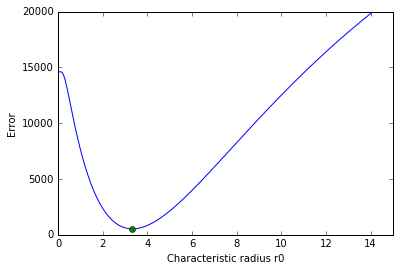

In [5]:
# Finding minimun
min_r0 = goldenSearch(-100, 100, error, 1e-10)
print 'Value of r0 that makes the function best fit the observed data:', min_r0

# Plotting
e = []
x = np.arange(0, 15, .01)
for i in x:
    e.append(error(i))

plt.xlim(0, 15)
plt.ylim(0, 20000)
plt.plot(x, e)
plt.plot(min_r0, error(min_r0), marker='o', linestyle='none')

plt.xlabel('Characteristic radius r0')
plt.ylabel('Error')
plt.show()